In [1]:
import numpy as np
from scipy import special
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Define constants
start_freq_mhz=167.
end_freq_mhz=198.
c = 3.e8

In [3]:
def calculate_depolarization(rm):
    wl_max = c/(start_freq_mhz*1.e6)
    wl_min = c/(end_freq_mhz*1.e6)
    fresS_min, fresC_min = special.fresnel(2*np.sqrt(rm/np.pi+0j)*wl_min)
    fresS_max, fresC_max = special.fresnel(2*np.sqrt(rm/np.pi+0j)*wl_max)
    cos_int = np.real(
        np.cos(2.*rm*wl_min**2.)/wl_min
        - np.cos(2.*rm*wl_max**2.)/wl_max
        + 2*np.sqrt(np.pi*rm+0j)*(fresS_min-fresS_max)
    )
    sin_int = np.real(
        np.sin(2.*rm*wl_min**2.)/wl_min
        - np.sin(2.*rm*wl_max**2.)/wl_max
        - 2*np.sqrt(np.pi*rm+0j)*(fresC_min-fresC_max)
    )
    eff_rot_angle = np.arctan2(sin_int, cos_int)
    const = (1/wl_min - 1/wl_max)/np.sqrt(cos_int**2 + sin_int**2)
    return 100.*(1.-1./const)

In [25]:
plot_rms = np.linspace(0, 10, num=200, endpoint=True)
depol_vals = np.zeros(len(plot_rms))
for rm_ind, rm in enumerate(plot_rms):
    depol_vals[rm_ind] = calculate_depolarization(rm)

In [5]:
print(depol_vals)

[ 0.          0.5967396   2.3738788   5.29250128  9.28880933 14.27567581
 20.14472979 26.76888013 34.00513529 41.69749716 49.67954251 57.77591145
 65.80084934 73.54860276 80.75839046 86.98735181 91.17366379 91.50482569
 88.77127    85.37702153 82.33728144 79.97094339 78.3829674  77.59465616
 77.5827699  78.29438393 79.65413631 81.56852997 83.92838301 86.60858235
 89.46094365 92.28434476 94.70928369 95.88780814 95.08325206 93.24391152
 91.28864159 89.5599393  88.19420803 87.25482263 86.76856973 86.73758804
 87.14440397 87.95471537 89.11917719 90.57413541 92.23989406 94.01130577
 95.72043485 96.99862385]


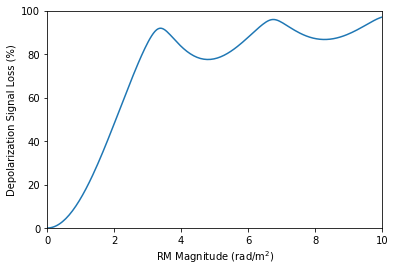

In [32]:
plt.plot(plot_rms, depol_vals, '-')
plt.xlim((0,10))
plt.ylim((0,100))
plt.xlabel('RM Magnitude (rad/m$^2$)')
plt.ylabel('Depolarization Signal Loss (%)')
plt.savefig('/Users/ruby/Documents/Diffuse Paper Response #3/depolarization.png', dpi=400)

In [30]:
calculate_depolarization(2.)

48.0682491242193